<a href="https://colab.research.google.com/github/Rohit-Madhesiya/LangGraph-Implementations/blob/main/MultiAI_RAG_Chatbot_using_LangGraph_and_AstraDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install langchain langgraph cassio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.9/130.9 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 50.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 4.0 MB/s eta 0:00:00


In [2]:
import os
import cassio
from google.colab import userdata

cassio.init(token=userdata.get("ASTRADB_APP_TOKEN"),database_id=userdata.get("ASTRADB_ID"))

In [3]:
!pip install langchain_community langchain_groq tiktoken langchainhub langchain_huggingface

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 111.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5

---
**VectorDB Configuration**

In [4]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader

urls=[
    "https://docs.python.org/3/whatsnew/3.13.html",
    "https://pandas.pydata.org/docs/getting_started/index.html",
    "https://www.langchain.com/langsmith",
    "https://python.langchain.com/docs/introduction/"
]

# load the url
docs=[WebBaseLoader(url).load() for url in urls]

doc_list=[item for sublist in docs for item in sublist]

text_splitter=RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    chunk_size=500,
    chunk_overlap=0
)
docs_split=text_splitter.split_documents(doc_list)


In [5]:
len(docs_split)

102

In [6]:
docs_split[0]

Document(metadata={'source': 'https://docs.python.org/3/whatsnew/3.13.html', 'title': 'What’s New In Python 3.13 — Python 3.13.2 documentation', 'description': 'Editors, Adam Turner and Thomas Wouters,. This article explains the new features in Python 3.13, compared to 3.12. Python 3.13 was released on October 7, 2024. For full details, see the changelog. ...', 'language': 'en'}, page_content='What’s New In Python 3.13 — Python 3.13.2 documentation\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n    Theme\n    \nAuto\nLight\nDark\n\n\n\nTable of Contents\n\nWhat’s New In Python 3.13\nSummary – Release Highlights\nNew Features\nA better interactive interpreter\nImproved error messages\nFree-threaded CPython\nAn experimental just-in-time (JIT) compiler\nDefined mutation semantics for locals()\nSupport for mobile platforms\n\n\nOther Language Changes\nNew Modules\nImproved Modules\nargparse\narray\nast\nasyncio\nbase64\ncompileall\nco

In [7]:
from langchain_huggingface import HuggingFaceEmbeddings
embeddings=HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling%2Fconfig.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [8]:
from langchain.vectorstores.cassandra import Cassandra
astra_vec_store=Cassandra(embedding=embeddings,
                          table_name='qa_mini_demo',
                          session=None,
                          keyspace=None
                          )

In [9]:
from langchain.indexes.vectorstore import VectorStoreIndexWrapper

astra_vec_store.add_documents(docs_split)
print("Inserted %i headlines."% len(docs_split))
astra_vec_index=VectorStoreIndexWrapper(vectorstore=astra_vec_store)

Inserted 102 headlines.


In [45]:
retriever=astra_vec_store.as_retriever()
retriever.invoke("What is Python?")

[Document(id='588175fe50f34294a6f7b14702235d73', metadata={'description': 'Editors, Adam Turner and Thomas Wouters,. This article explains the new features in Python 3.13, compared to 3.12. Python 3.13 was released on October 7, 2024. For full details, see the changelog. ...', 'language': 'en', 'source': 'https://docs.python.org/3/whatsnew/3.13.html', 'title': 'What’s New In Python 3.13 — Python 3.13.2 documentation'}, page_content='CPython Bytecode Changes\nC API Changes\nNew Features\nChanged C APIs\nLimited C API Changes\nRemoved C APIs\nDeprecated C APIs\nPending Removal in Python 3.14\nPending Removal in Python 3.15\nPending Removal in Future Versions\n\n\n\n\nBuild Changes\nPorting to Python 3.13\nChanges in the Python API\nChanges in the C API\n\n\nRegression Test Changes\nNotable changes in 3.13.1\nsys\n\n\n\n\n\n\n\nPrevious topic\nWhat’s New in Python\n\n\nNext topic\nWhat’s New In Python 3.12\n\n\nThis Page\n\nReport a Bug\n\nShow Source\n        \n\n\n\n\n\n«\n\n\n\n\n\nNav

---
**LangGraph Application**

In [11]:
from typing import Literal
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.pydantic_v1 import BaseModel,Field

/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py:3553: LangChainDeprecationWarning: As of langchain-core 0.3.0, LangChain uses pydantic v2 internally. The langchain_core.pydantic_v1 module was a compatibility shim for pydantic v1, and should no longer be used. Please update the code to import from Pydantic directly.

For example, replace imports like: `from langchain_core.pydantic_v1 import BaseModel`
with: `from pydantic import BaseModel`
or the v1 compatibility namespace if you are working in a code base that has not been fully upgraded to pydantic 2 yet. 	from pydantic.v1 import BaseModel

  exec(code_obj, self.user_global_ns, self.user_ns)


In [99]:
# Data Model
class RouteQuery(BaseModel):
  """Route a user query to the most relevant datasource."""
  datasource:Literal['vectorstore','wiki_search','arxiv_search']=Field(
      ...,
      description="Given a user question choose to route it to wikipedia or a vectorstore."
  )

In [100]:
from langchain_groq import ChatGroq

llm=ChatGroq(groq_api_key=userdata.get("GROQ_API_KEY"),
             model_name="deepseek-r1-distill-llama-70b"
            )
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7b0d5c5817d0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7b0d5c569250>, model_name='deepseek-r1-distill-llama-70b', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [101]:
structured_llm_router=llm.with_structured_output(RouteQuery)

**Prompt**

In [102]:
system="""You are an expert at routing a user question to a vectorstore, wikipedia or arxiv.
The vectorstore contains documents related to langchain, python and langsmith.
Use the vectorstore for question on these topics.
For research papers and stuff use arxiv-search. Otherwise use wiki-search."""

route_prompt=ChatPromptTemplate.from_messages([
    ("system",system),
    ("human","{question}")
])
route_prompt

ChatPromptTemplate(input_variables=['question'], input_types={}, partial_variables={}, messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], input_types={}, partial_variables={}, template='You are an expert at routing a user question to a vectorstore, wikipedia or arxiv.\nThe vectorstore contains documents related to langchain, python and langsmith.\nUse the vectorstore for question on these topics.\nFor research papers and stuff use arxiv-search. Otherwise use wiki-search.'), additional_kwargs={}), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['question'], input_types={}, partial_variables={}, template='{question}'), additional_kwargs={})])

In [103]:
question_router=route_prompt | structured_llm_router

In [104]:
print(question_router.invoke(
    {"question":"what is attention is all you need"}
))

datasource='arxiv_search'


---
**Wikipedia and Arxiv Configuration**

In [18]:
!pip install wikipedia arxiv

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 3.7 MB/s eta 0:00:00
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11679 sha256=a9ce087c92264553cb88410f3da5c031cba8981ef36d07c787a1720d72c5439f
  Stored in directory: /root/.cache/pip/wheels/8f/ab/cb/45ccc40522d3a1c41e1d2ad53b8f33a62f394011ec38cd71c6
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6047 sha256=c3cc5115c0e4592c1e296df6da7ff0026067fbbe964a950b39fef1ed6550050a
  Stored in directory: /root/.cache/pip/wheels/3b/25/2a/105d6a15df6914f4d15047691c6c28f9052cc1173e40285d03
Successfully built wikipedia sgmllib3k


In [19]:
from langchain_community.utilities import WikipediaAPIWrapper,ArxivAPIWrapper
from langchain_community.tools import WikipediaQueryRun,ArxivQueryRun

wiki_api_wrapper=WikipediaAPIWrapper(top_k_results=1,doc_content_chars_max=200)
arxiv_api_wrapper=ArxivAPIWrapper(top_k_results=1,doc_content_chars_max=200)

wiki=WikipediaQueryRun(api_wrapper=wiki_api_wrapper)
arxiv=ArxivQueryRun(api_wrapper=arxiv_api_wrapper)

In [20]:
wiki.run("Who is Sachin?")

'Page: Sachin Tendulkar\nSummary: Sachin Ramesh Tendulkar ( ; pronounced [sətɕin teːɳɖulkəɾ]; born 24 April 1973) is an Indian former international cricketer who captained the Indian national team. He i'

In [21]:
arxiv.run("Summary about arXiv:2502.19607")

'Published: 2020-10-13\nTitle: Sensitivity of BLANC to human-scored qualities of text summaries\nAuthors: Oleg Vasilyev, Vedant Dharnidharka, Nicholas Egan, Charlene Chambliss, John Bohannon\nSummary: We '

---
**AI Agent Application using LangGraph**

In [105]:
from typing import List
from typing_extensions import TypedDict

class GraphState(TypedDict):
  """
  Represents the state of our graph.
  Attributes:
    question: question
    generation: LLM generation
    documents: list of documents
  """
  question:str
  generation:str
  documents:List[str]

In [106]:
from langchain.schema import Document

def retrieve(state):
  """
  Retrieve documents
  Args:
    state (dict): The current graph state
  Returns:
    state (dict): New key added to state, documents that contain retrieved documents
  """
  print("---Retrieve----")
  question=state['question']
  # Retrieval
  docs=retriever.invoke(question)
  return {"documents":docs,"question":question}

In [107]:
def wiki_search(state):
  """
  wiki search based on the re-phrased question
  Args:
    state (dict): The current graph state
  Returns:
    state (dict): Updates documents key with appended web results
  """
  print("---wikipedia---")
  print("---HELlO---")
  question=state['question']
  print(question)
  # wiki-search
  docs=wiki.invoke({"query":question})
  wiki_results=docs
  wiki_results=Document(page_content=wiki_results)
  return{"documents":wiki_results,"question":question}

In [108]:
def arxiv_search(state):
  """
  arxiv search based on the re-phrased question
  Args:
    state (dict): The current graph state
  Returns:
    state (dict): Updates documents key with appended web results
  """
  print("---arxiv---")
  print("---HELlO---")
  question=state['question']
  print(question)
  # arxiv-search
  docs=arxiv.invoke({"query":question})
  arxiv_results=docs
  arxiv_results=Document(page_content=arxiv_results)
  return{"documents":arxiv_results,"question":question}

**Edges**

In [109]:
def route_question(state):
  """
  Route question to wiki search or RAG.
  Args:
    state (dict): The current graph state
  Returns:
    str: Next node to call
  """
  print("---ROUTE QUESTIONS---")
  question=state['question']
  source=question_router.invoke({"question":question})
  print(f"SOURCE: {source}")
  if source.datasource=='arxiv_search':
    print("---ROUTE QUESTION TO ARXIV SEARCH---")
    return "arxiv_search"
  elif source.datasource=='wiki_search':
    print("---ROUTE QUESTION TO WIKI SEARCH---")
    return "wiki_search"
  elif source.datasource=='vectorstore':
    print("---ROUTE QUESTION TO VECTORSTORE---")
    return "vectorstore"
  else:
    print(f"---WARNING: Unexpected datasource: {source.datasource}---")
    return "wiki_search"

In [110]:
from langgraph.graph import START,StateGraph,END

workflow=StateGraph(GraphState)
# Define Nodes
workflow.add_node("retrieve",retrieve)
workflow.add_node("wiki_search",wiki_search)
workflow.add_node("arxiv_search",arxiv_search)

# Build the graph
workflow.add_conditional_edges(
    START,
    route_question,
    {
        "arxiv_search":"arxiv_search",
        "wiki_search":"wiki_search",
        "vectorstore":"retrieve"
    }
)
workflow.add_edge("retrieve",END)
workflow.add_edge("wiki_search",END)
workflow.add_edge("arxiv_search",END)

# compile the graph

app=workflow.compile()

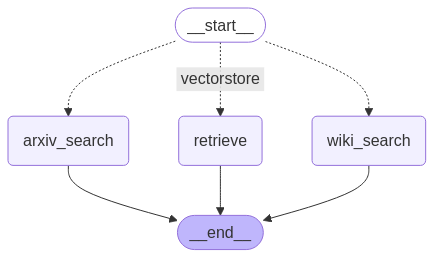

In [111]:
app

**Retriever Example Input**

In [112]:
from pprint import pprint

# Run
inputs={"question":"What is Langchain?"}
for output in app.stream(inputs):
  for k,v in output.items():
    # Node
    pprint(f"Node '{k}':")
    # Optional: print full state at each node
    # pprint.pprint(Value['keys'],indent=2,width=80,depth=None)
  pprint("\n---\n")
# Final generation
pprint(v['documents'][0].page_content)

---ROUTE QUESTIONS---


SOURCE: datasource='vectorstore'
---ROUTE QUESTION TO VECTORSTORE---
---Retrieve----
"Node 'retrieve':"
'\n---\n'
('LangChain is a framework for developing applications powered by large '
 'language models (LLMs).\n'
 'LangChain simplifies every stage of the LLM application lifecycle:')


**Wikipedia Example Input**

In [113]:
from pprint import pprint

# Run
inputs={"question":"Who is Tony Stark?"}
for output in app.stream(inputs):
  for k,v in output.items():
    # Node
    pprint(f"Node '{k}':")
    # Optional: print full state at each node
    # pprint.pprint(Value['keys'],indent=2,width=80,depth=None)
  pprint("\n---\n")
# Final generation
pprint(v['documents'].page_content)

---ROUTE QUESTIONS---
SOURCE: datasource='wiki_search'
---ROUTE QUESTION TO WIKI SEARCH---
---wikipedia---
---HELlO---
Who is Tony Stark?
"Node 'wiki_search':"
'\n---\n'
('Page: Iron Man\n'
 'Summary: Iron Man is a superhero appearing in American comic books published '
 'by Marvel Comics. Co-created by writer and editor Stan Lee, developed by '
 'scripter Larry Lieber, and designed')


**Arxiv Example**

In [114]:
from pprint import pprint

# Run
inputs={"question":"Summarize Attention is all you need?"}
for output in app.stream(inputs):
  for k,v in output.items():
    # Node
    pprint(f"Node '{k}':")
    # Optional: print full state at each node
    # pprint.pprint(Value['keys'],indent=2,width=80,depth=None)
  pprint("\n---\n")
# Final generation
pprint(v['documents'].page_content)

---ROUTE QUESTIONS---
SOURCE: datasource='arxiv_search'
---ROUTE QUESTION TO ARXIV SEARCH---
---arxiv---
---HELlO---
Summarize Attention is all you need?
"Node 'arxiv_search':"
'\n---\n'
('Published: 2024-04-03\n'
 'Title: Positioning is All You Need\n'
 'Authors: Xin Li\n'
 'Summary: One can drive safely with a GPS without memorizing a world map (not '
 'to\n'
 'mention the dark regions that humans have never')
